In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 1) load the given dataset

In [174]:
df = pd.read_csv("Data.txt")

# 2) print all the column names

In [175]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3) describe the data

In [176]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


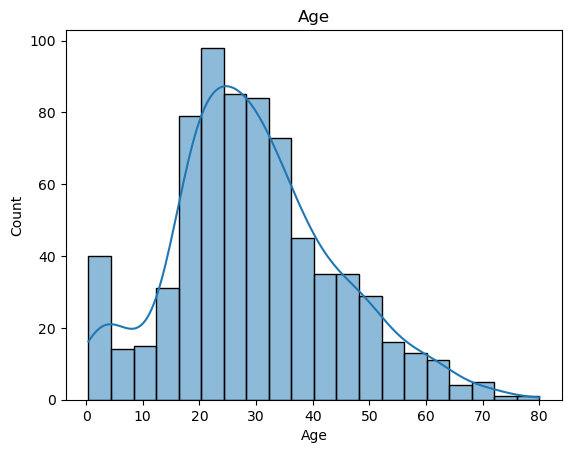

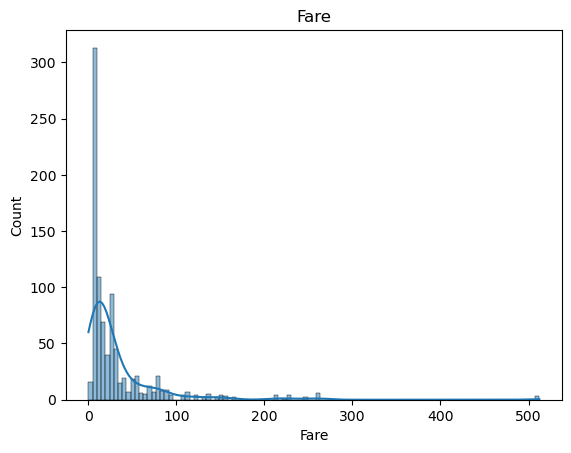

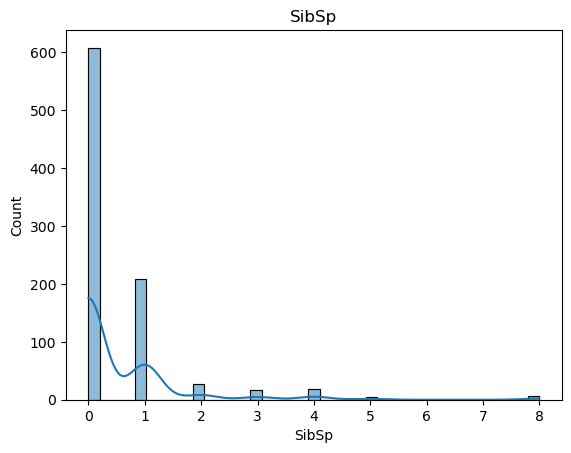

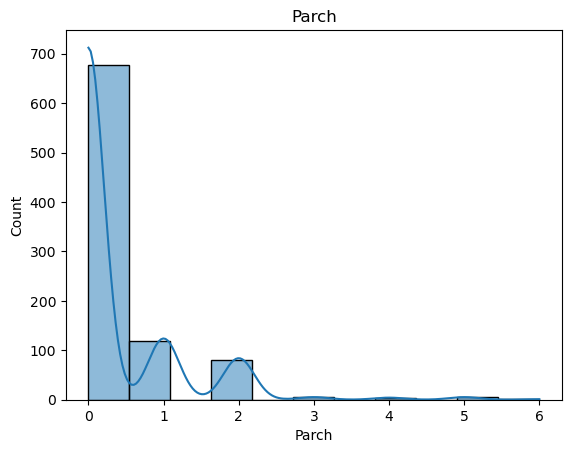

In [177]:
num_cols = ['Age','Fare','SibSp','Parch']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

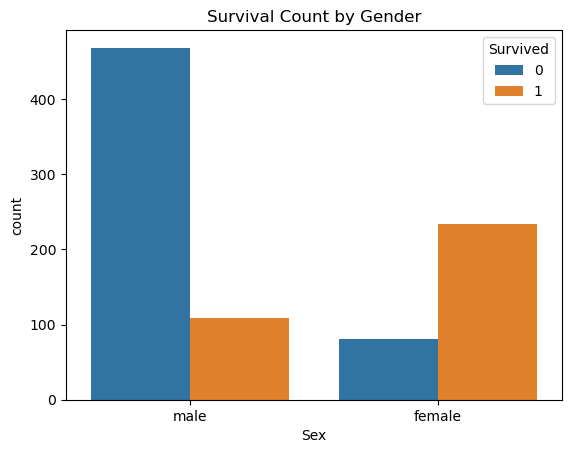

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.savefig("Survival Count by Gender")
plt.show()


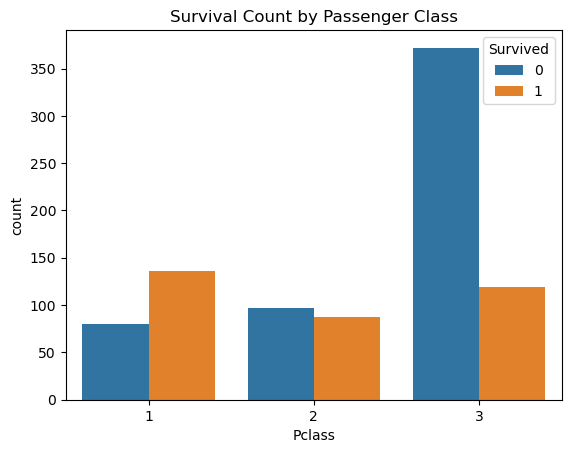

In [179]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.savefig("Survival Count by Passenger Class")
plt.show()


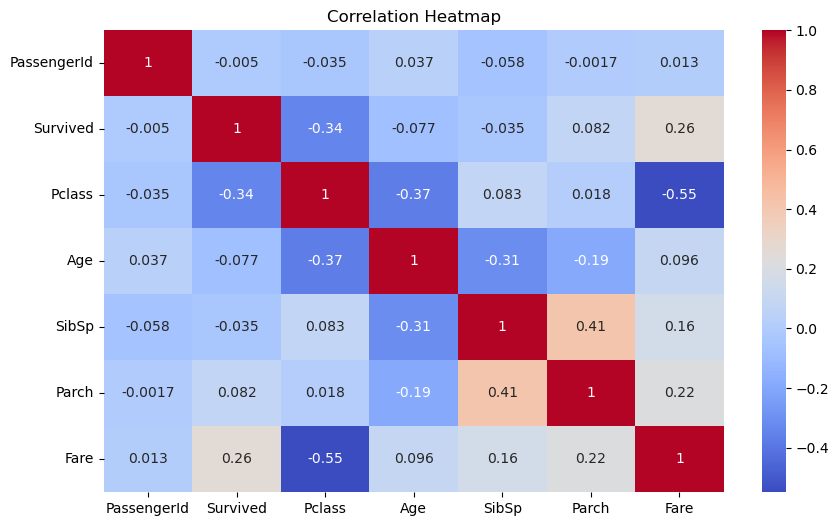

In [180]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("Correlation_Heatmap.png")
plt.show()


# 4) check the null value

In [181]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5) if there are Null values, Handle these

In [182]:
#df = df.dropna()
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\Krish Pandya\AppData\Local\Temp\ipykernel_7368\238466452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Krish Pandya\AppData\Local\Temp\ipykernel_7368\238466452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [183]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [184]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


# Part-2: Working with Models

# 1) Create the target data and feature data where target data is survived

In [186]:
X = df.drop(['Survived','Name','Ticket','Cabin'],axis=1)
y = df.Survived

In [187]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,38.0,1,0,71.2833,False,False
2,3,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,35.0,1,0,53.1000,False,True
4,5,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,False,True
887,888,1,1,19.0,0,0,30.0000,False,True
888,889,3,1,28.0,1,2,23.4500,False,True
889,890,1,0,26.0,0,0,30.0000,False,False


# 2) apply label-encoding on categorical data

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
enc =LabelEncoder()

In [190]:
X['Sex'] = enc.fit_transform(X['Sex'])


In [191]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,38.0,1,0,71.2833,False,False
2,3,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,35.0,1,0,53.1000,False,True
4,5,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,False,True
887,888,1,1,19.0,0,0,30.0000,False,True
888,889,3,1,28.0,1,2,23.4500,False,True
889,890,1,0,26.0,0,0,30.0000,False,False


# 3) Split the data into Training and testing Set 

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# 4) Create a Logistic regression model for Target and feature data

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Krish Pandya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [195]:
clf.score(X_test,y_test)

0.8156424581005587

In [196]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [197]:
y_pred = clf.predict(X_test)

# 5) Display the Confusion Matrix

In [207]:
confusion_matrix(y_test, y_pred)


array([[99, 13],
       [20, 47]], dtype=int64)

# 6)  Find the Accuracy Score 

In [199]:
accuracy_score(y_pred,y_test)

0.8156424581005587

# 7) Find the Precision Score 

In [200]:
precision_score(y_pred,y_test)

0.7014925373134329

# 8) Find the Recall Score 

In [201]:
recall_score(y_pred,y_test)

0.7833333333333333

# 9) Find the F1 Score 

In [202]:
f1_score(y_pred,y_test)

0.7401574803149606

# 10) Find the probability of testing data 

In [203]:
y_prob = clf.predict_proba(X_test)

In [204]:
y_prob

array([[0.77712392, 0.22287608],
       [0.90168541, 0.09831459],
       [0.8441432 , 0.1558568 ],
       [0.06452382, 0.93547618],
       [0.88246148, 0.11753852],
       [0.83910961, 0.16089039],
       [0.24098159, 0.75901841],
       [0.9265931 , 0.0734069 ],
       [0.37893976, 0.62106024],
       [0.23705164, 0.76294836],
       [0.87535251, 0.12464749],
       [0.3809144 , 0.6190856 ],
       [0.83031339, 0.16968661],
       [0.95380794, 0.04619206],
       [0.27511107, 0.72488893],
       [0.07923053, 0.92076947],
       [0.78814732, 0.21185268],
       [0.900679  , 0.099321  ],
       [0.92215121, 0.07784879],
       [0.41427782, 0.58572218],
       [0.90524168, 0.09475832],
       [0.88271671, 0.11728329],
       [0.33746434, 0.66253566],
       [0.55121606, 0.44878394],
       [0.06935882, 0.93064118],
       [0.84161202, 0.15838798],
       [0.9398503 , 0.0601497 ],
       [0.14747408, 0.85252592],
       [0.56104385, 0.43895615],
       [0.91369518, 0.08630482],
       [0.

# 11) Display ROC Curve and find the AUC score 

In [205]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

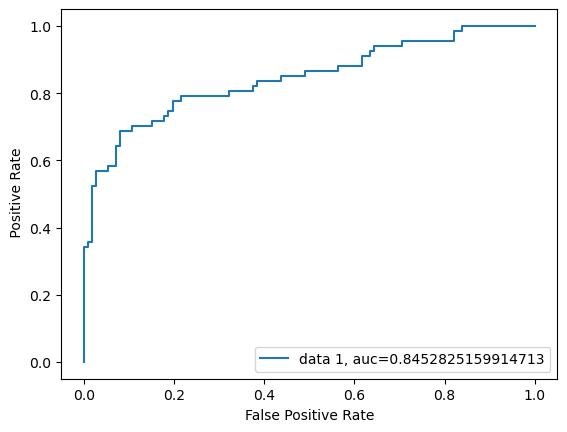

In [208]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")
plt.savefig("AUC")
plt.show()